#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data from file csv

In [3]:
data = pd.read_csv('Data/BonBanh_cleaned.csv')
data

,Hãng xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Dung tích,Nhiên liệu,Số chỗ ngồi,Giá xe (triệu)
0,Peugeot,2022,Xe đã dùng,30000,Lắp ráp trong nước,Crossover,Số tự động,1.2,Xăng,5,679
1,Mercedes Benz,2014,Xe đã dùng,90000,Lắp ráp trong nước,Sedan,Số tự động,3.0,Xăng,5,499
2,Mercedes Benz,2022,Xe đã dùng,500,Lắp ráp trong nước,Sedan,Số tự động,2.0,Xăng,5,2229
3,Mercedes Benz,2021,Xe đã dùng,80,Lắp ráp trong nước,Sedan,Số tự động,1.5,Xăng,5,1399
4,Mercedes Benz,2022,Xe đã dùng,8888,Lắp ráp trong nước,Sedan,Số tự động,2.0,Xăng,5,1788
...,...,...,...,...,...,...,...,...,...,...,...
18351,Kia,2009,Xe đã dùng,1111,Nhập khẩu,Hatchback,Số tự động,1.0,Xăng,5,158
18352,Hyundai,2018,Xe đã dùng,80000,Lắp ráp trong nước,Sedan,Số tay,1.4,Xăng,5,328
18353,Toyota,2023,Xe mới,0,Lắp ráp trong nước,Sedan,Số tự động,1.5,Xăng,5,592
18354,Mitsubishi,2023,Xe mới,0,Nhập khẩu,Sedan,Số tự động,1.2,Xăng,5,465


#### Split the type of columns

In [4]:
data.nunique()

Hãng xe             68
Năm sản xuất        35
Tình trạng           2
Số km đã đi       1053
Xuất xứ              2
Kiểu dáng           10
Hộp số               3
Dung tích           54
Nhiên liệu           4
Số chỗ ngồi         18
Giá xe (triệu)    1786
dtype: int64

In [5]:
str_numerical_cols = []
not_str_numerical_cols = []
categorical_cols = []
for col in data.columns:
    if len(data[col].unique()) < 12:
        categorical_cols.append(col)
    else:
        if data[col].dtypes == 'object':
            str_numerical_cols.append(col)
        else:
            if col != 'Giá xe (triệu)':
                not_str_numerical_cols.append(col)
print('String numerical columns:', str_numerical_cols)
print('Not_string numerical columns:', not_str_numerical_cols)
print('Categorical columns:', categorical_cols)

String numerical columns: ['Hãng xe']
Not_string numerical columns: ['Năm sản xuất', 'Số km đã đi', 'Dung tích', 'Số chỗ ngồi']
Categorical columns: ['Tình trạng', 'Xuất xứ', 'Kiểu dáng', 'Hộp số', 'Nhiên liệu']


#### Handle outliers

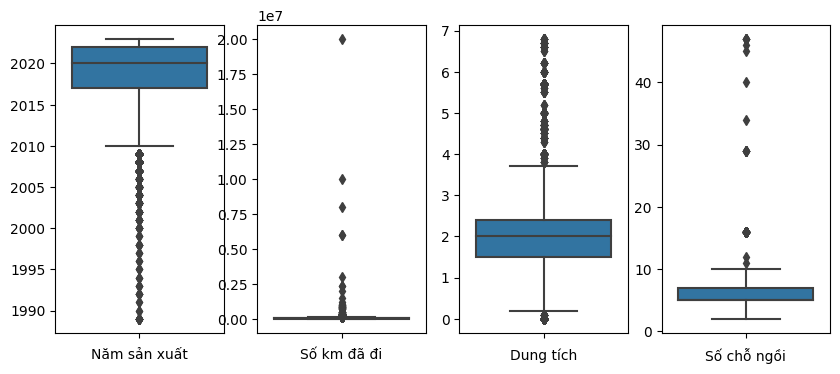

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i in range(len(not_str_numerical_cols)):
    col = not_str_numerical_cols[i]
    sns.boxplot(y=data[col], ax=axes[i])
for i in range(len(not_str_numerical_cols)):
    axes[i].set_xlabel(not_str_numerical_cols[i])
    axes[i].set_ylabel("")
plt.show()

In [7]:
#count number outlier of each column
def count_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outlier = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    return outlier.shape[0]

outlier_dict = {}
for col in not_str_numerical_cols:
    outlier_dict[col] = count_outlier(data, col)
outlier_dict

{'Năm sản xuất': 1051,
 'Số km đã đi': 287,
 'Dung tích': 1213,
 'Số chỗ ngồi': 141}

In [27]:
#take all value in hang xe column that have count = 1
hang_xe_count = data['Hãng xe'].value_counts()
hang_xe_count = hang_xe_count[hang_xe_count > 50]
hang_xe_count = hang_xe_count.index.tolist()
print(len(hang_xe_count))

26


#### Vizualize the number of in each value of categorical column

[]

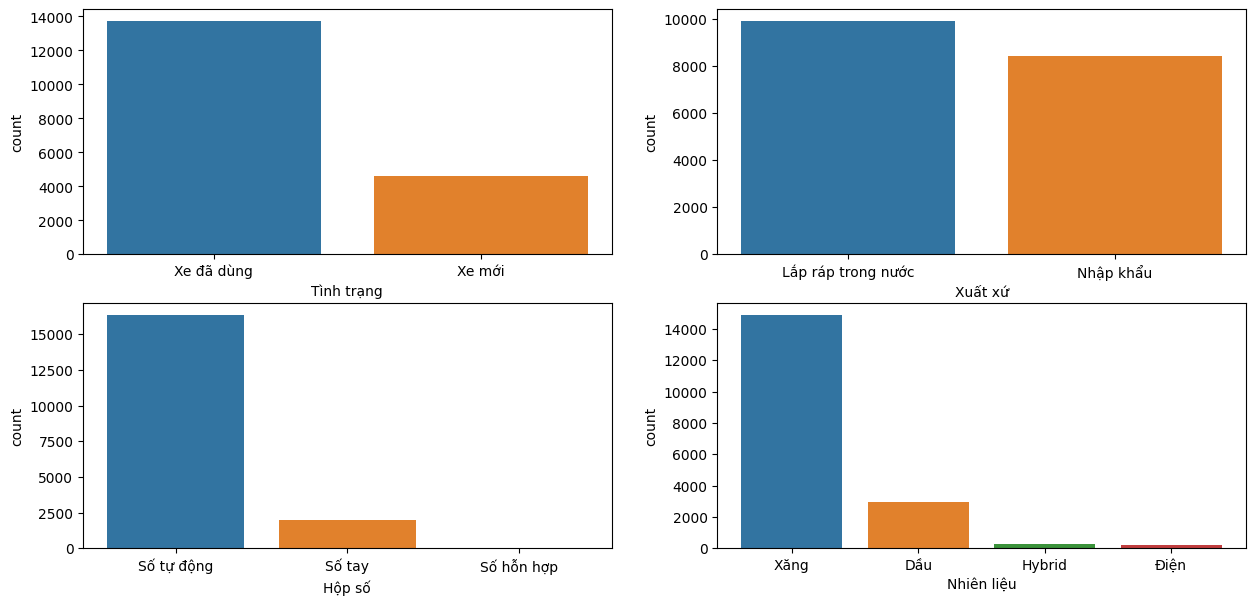

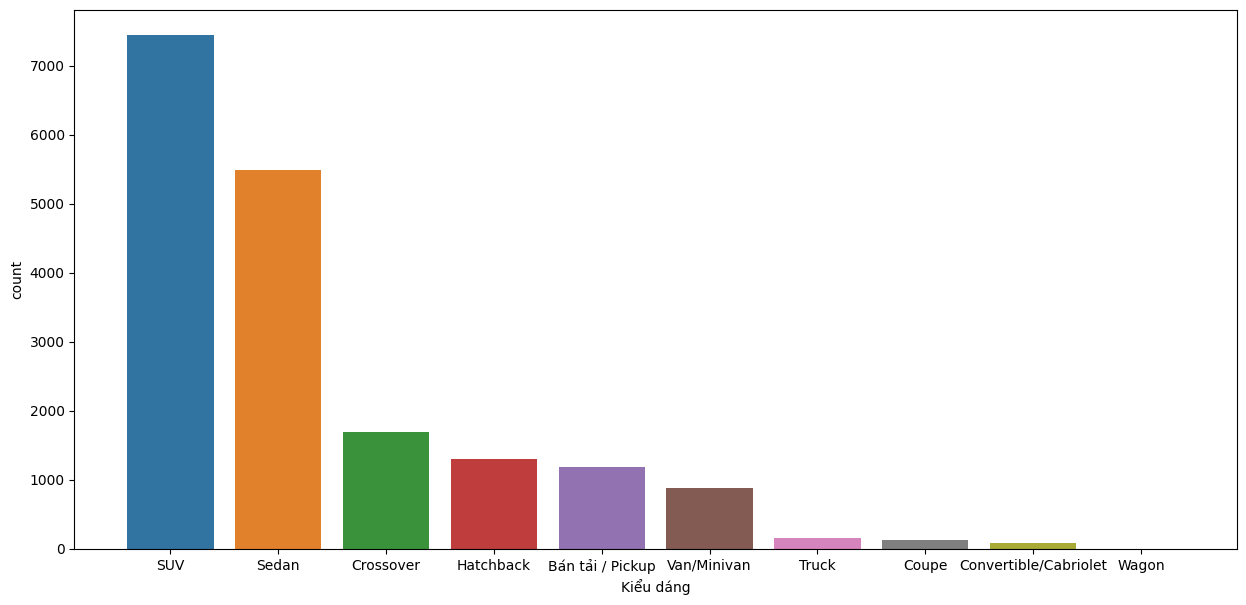

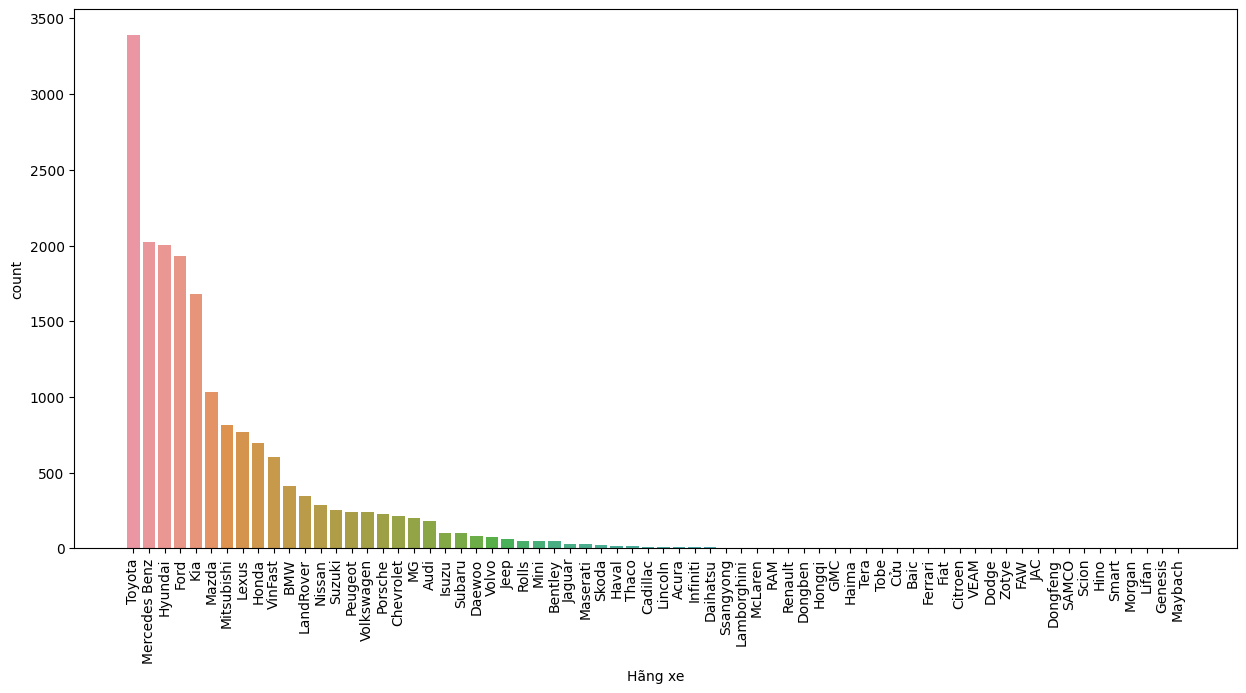

In [36]:
plt.figure(figsize=(15,7))
for i,col in enumerate(['Tình trạng', 'Xuất xứ','Hộp số', 'Nhiên liệu']):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()

plt.figure(figsize=(15,7))
sns.countplot(x=data['Kiểu dáng'], order=data['Kiểu dáng'].value_counts().index)
plt.plot()

plt.figure(figsize=(15,7))
sns.countplot(x=data['Hãng xe'], order=data['Hãng xe'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

#### Correlation matrix

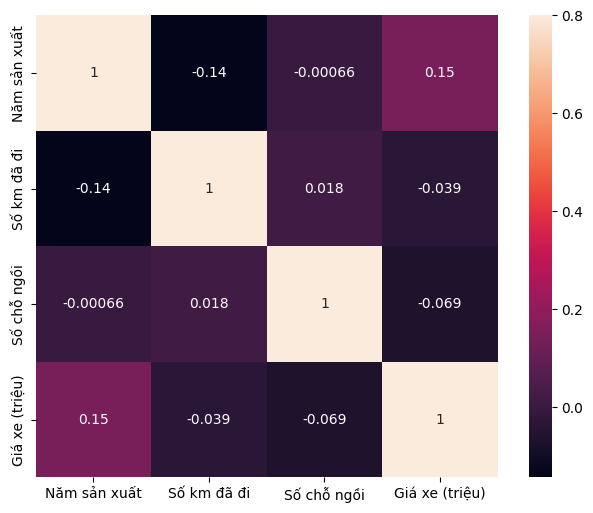

In [17]:
not_str_numerical_cols1 = not_str_numerical_cols.copy()
not_str_numerical_cols1.append('Giá xe (triệu)')
corrmat = data[not_str_numerical_cols1].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

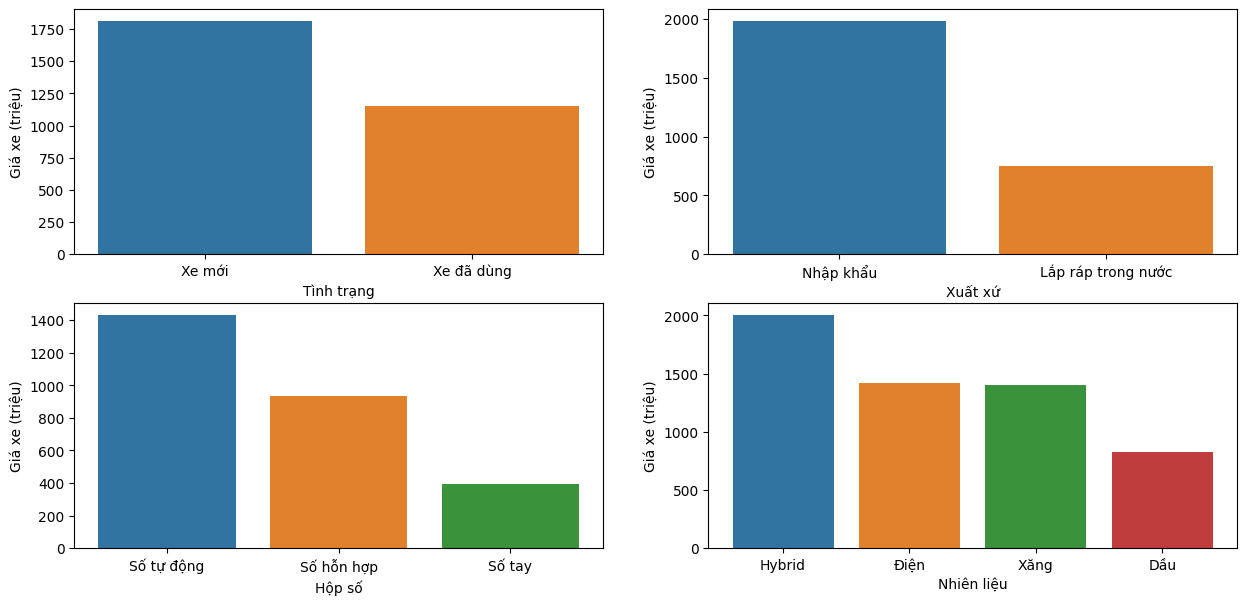

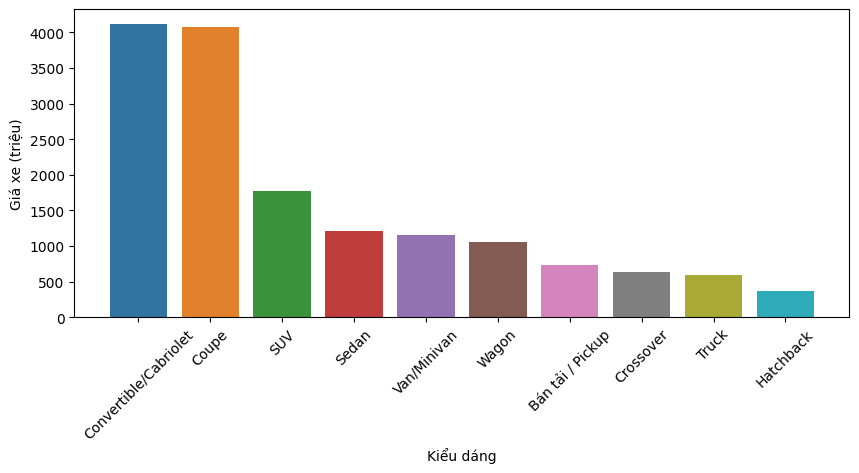

In [35]:
plt.figure(figsize=(15, 7))
for i,col in enumerate(['Tình trạng', 'Xuất xứ','Hộp số', 'Nhiên liệu']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=col, y='Giá xe (triệu)', data=data.groupby(col)['Giá xe (triệu)'].mean().sort_values(ascending=False).reset_index())
    plt.plot()

plt.figure(figsize=(10, 4))
sns.barplot(x='Kiểu dáng', y='Giá xe (triệu)', data=data.groupby('Kiểu dáng')['Giá xe (triệu)'].mean().sort_values(ascending=False).reset_index())
plt.xticks(rotation=45)
plt.plot()
plt.show()

[]

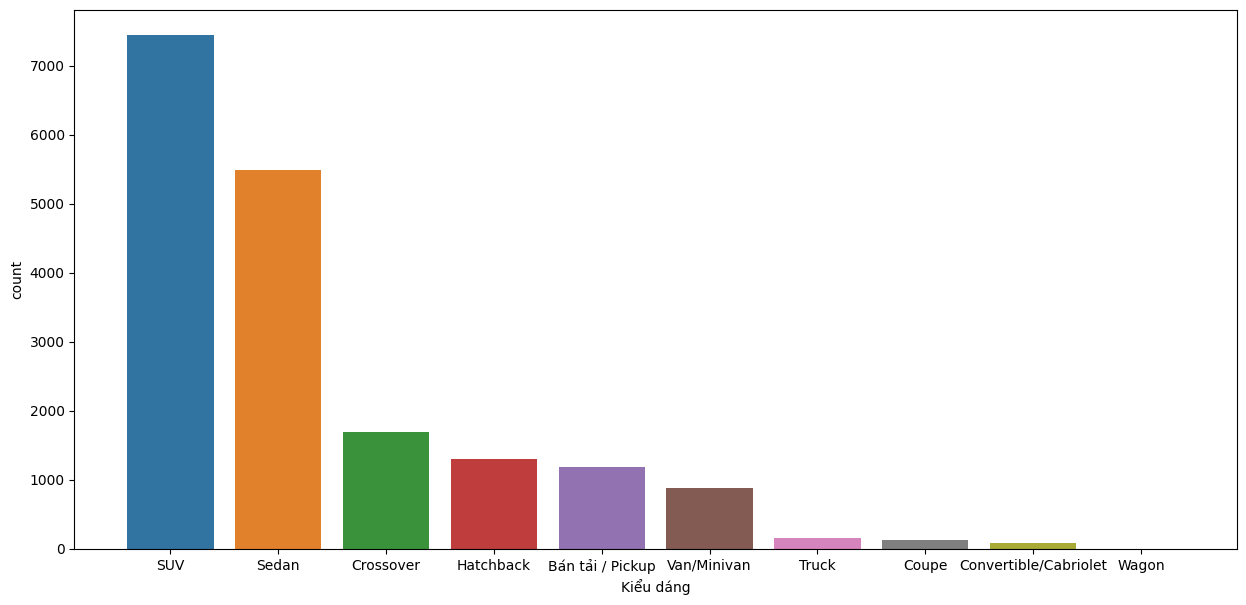

In [42]:
#show the number in each category
plt.figure(figsize=(15,7))
sns.countplot(x=data['Kiểu dáng'], order=data['Kiểu dáng'].value_counts().index)
plt.plot()

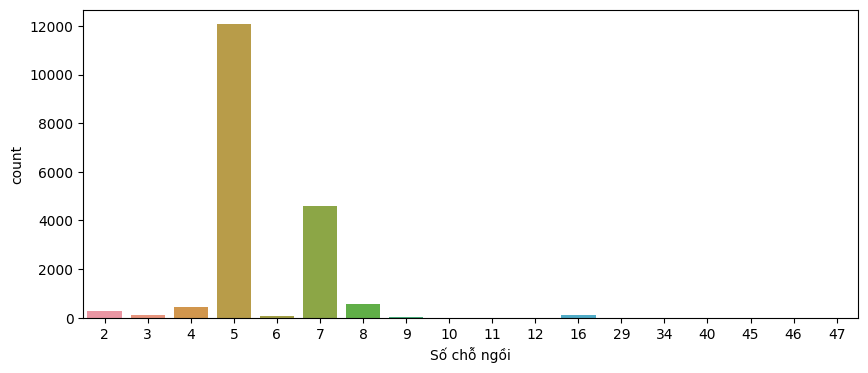

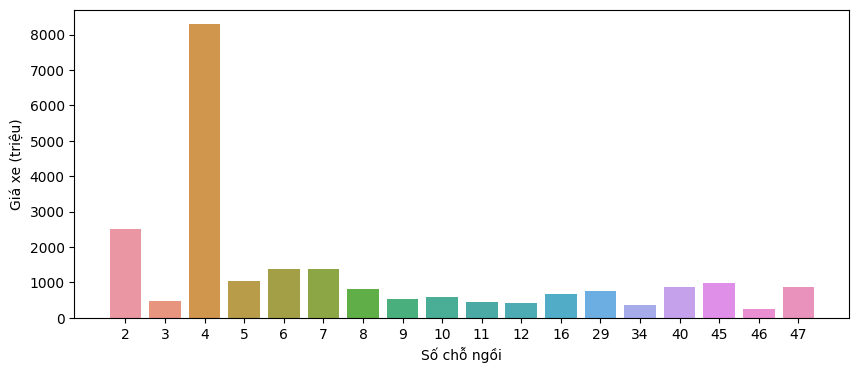

In [41]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Số chỗ ngồi', data=data)
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x='Số chỗ ngồi', y='Giá xe (triệu)', data=data.groupby('Số chỗ ngồi')['Giá xe (triệu)'].mean().sort_values(ascending=False).reset_index())
plt.plot()
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
for i,col in enumerate(not_str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col])
    plt.plot()

#### Plot all string numerical columns

In [ ]:
plt.figure(figsize=(15,15))
for i,col in enumerate(str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()

In [ ]:
# vizualize price of each value khac in all str_numerical_cols
plt.figure(figsize=(15,15))
for i,col in enumerate(str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=data[col], y=data['Giá xe (triệu)'], order=data[col].value_counts().index)
    plt.plot()

#### Plot all categorical column

In [ ]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()